## Predicting Iris Species
### Problem:
- **Objective**: Predict Iris species from petal and sepal measures (Setosa, Versicolour, and Virginica). 
- **How**: Building a Feedforward Neural Network for Classification.
- **Dataset**: Sepal Length, Sepal Width, Petal Length and Petal Width (4 features) for 150 samples (50 per class).
- **Target variable**: Iris specie: Setosa, Versicolour, and Virginica

### Steps:
**Load the Dataset**: Iris dataset from scikit-learn ([Link Here](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_iris.html))

**Preprocess the Data**:
  1) Select features (X) and labels (y) from the dataset
  2) Split data into training and testing sets
  3) Scale input features
  4) Normalize target
  5) Convert features and labels to tensors

**Build the Neural Network**: Feedforward Neural Network with the following layers:

*Input Layer*: Match the number of input features.

*Hidden Layers*: One hidden layer with ReLU activation (32 units).

*Output Layer*: Three neurons for the three different categories (Setosa, Versicolour, and Virginica).

**Train the Model**: 
 1) Use the Cross Entropy loss function and Adam optimizer. 
 2) Train for 400 epochs.
 3) Calculate and print the validation loss during training.

**Evaluate the Model**:  
 1) Calculate test loss after training.
 2) Plot training VS validation loss curves
 3) Calculate R-squared

In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

In [2]:
class IrisData(Dataset):
    def __init__(self, train=True, test_size=0.2, random_state=42):
        # Load the dataset
        iris = load_iris()
        X = iris.data  # Features
        y = iris.target  # Labels (0, 1, or 2)

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        # Scale input features
        scaler_X = StandardScaler()
        X_train_scaled = scaler_X.fit_transform(X_train)
        X_test_scaled = scaler_X.transform(X_test)

        if train:
            self.X = X_train_scaled
            self.y = y_train  # Normalize target
        else:
            self.X = X_test_scaled
            self.y = y_test
    
        
        # Convert features and labels to tensors
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.long)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [3]:
train_dataset = IrisData(train=True, test_size=0.3)
test_dataset = IrisData(train=False, test_size=0.3)

In [4]:
class IrisNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(IrisNN, self).__init__()
        # Define the layers
        self.linear1 = nn.Linear(input_size, 32)
        self.linear2 = nn.Linear(32, output_size)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)

        return x
    

In [5]:
X_train, X_val, y_train, y_val = train_test_split(train_dataset.X, train_dataset.y, test_size=0.2, random_state=42)

In [6]:
X_train.shape[1]

4

In [7]:
input_size = X_train.shape[1]
output_size = 3 #nº of iris species
model = IrisNN(input_size, output_size)

In [8]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [9]:
epochs = 400

# Lists to store losses for plotting
train_losses = np.array([])
val_losses = np.array([])

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    pred = model(X_train)
    train_loss = loss(pred, y_train)

    train_loss.backward()
    optimizer.step()

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient computation
        val_pred = model(X_val)
        val_loss = loss(val_pred, y_val)

    # Print training and validation loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}/{epochs}, Train Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

    train_losses = np.append(train_losses, train_loss.item())
    val_losses = np.append(val_losses, val_loss.item())

Epoch 0/400, Train Loss: 1.2113, Validation Loss: 1.2488
Epoch 10/400, Train Loss: 1.1151, Validation Loss: 1.1603
Epoch 20/400, Train Loss: 1.0261, Validation Loss: 1.0780
Epoch 30/400, Train Loss: 0.9439, Validation Loss: 1.0017
Epoch 40/400, Train Loss: 0.8665, Validation Loss: 0.9304
Epoch 50/400, Train Loss: 0.7937, Validation Loss: 0.8642
Epoch 60/400, Train Loss: 0.7261, Validation Loss: 0.8039
Epoch 70/400, Train Loss: 0.6639, Validation Loss: 0.7494
Epoch 80/400, Train Loss: 0.6082, Validation Loss: 0.7011
Epoch 90/400, Train Loss: 0.5592, Validation Loss: 0.6587
Epoch 100/400, Train Loss: 0.5163, Validation Loss: 0.6209
Epoch 110/400, Train Loss: 0.4793, Validation Loss: 0.5880
Epoch 120/400, Train Loss: 0.4478, Validation Loss: 0.5592
Epoch 130/400, Train Loss: 0.4207, Validation Loss: 0.5344
Epoch 140/400, Train Loss: 0.3970, Validation Loss: 0.5129
Epoch 150/400, Train Loss: 0.3762, Validation Loss: 0.4941
Epoch 160/400, Train Loss: 0.3576, Validation Loss: 0.4775
Epoch 17

In [10]:
model.eval()

with torch.no_grad():
    predictions = model(test_dataset.X)
    loss_fn = loss(predictions, test_dataset.y)
test_loss = loss_fn / len(test_dataset.X)
print(f'Test Loss: {loss_fn.item()}')

Test Loss: 0.12885312736034393


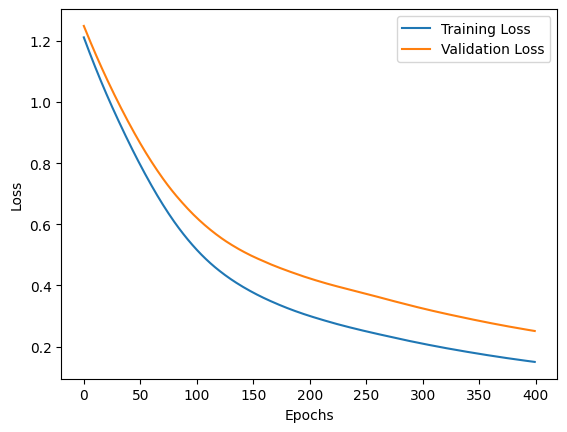

In [11]:
# Plot loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
_, predicted = torch.max(predictions, 1)

In [14]:
predicted

tensor([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0])

In [15]:
from sklearn.metrics import r2_score
r2 = r2_score(test_dataset.y, predicted)
print(f"R-squared: {r2:.4f}")

R-squared: 1.0000
